## load package

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import resample

In [3]:
import lazypredict

## import data

In [4]:
!pwd

/Users/ricky/Desktop/sp23-ancient-artifacts-team8/3_ml/binary_classification


In [5]:
master_micro = pd.read_csv("../../0_data/master.csv")

In [6]:
master_micro

,Unnamed: 0,Id,Img Id,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,...,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd,size_micro,type_micro
0,0,104,10708,30.893,38.251,36.878,46.822,10.179,44.168,10.102,...,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,0.214,unknown,lithic
1,1,19,5682,27.727,33.375,35.149,40.001,9.029,39.022,7.978,...,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,0.214,unknown,lithic
2,2,14,4826,26.726,36.061,30.199,46.332,8.025,47.365,7.753,...,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,0.219,unknown,lithic
3,3,1,2812,24.408,36.198,25.039,57.353,5.086,50.536,4.904,...,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,0.251,unknown,lithic
4,4,83,9441,22.869,29.388,24.044,39.820,4.390,38.568,3.948,...,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,0.276,unknown,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483648,600,591,13305,0.146,0.155,0.129,0.168,0.129,0.166,0.131,...,1.000,0.069,0.129,55.000,1.271,0.000,0.000,NaN,4mm,soil
483649,601,464,10826,0.137,0.141,0.128,0.155,0.128,0.147,0.127,...,1.000,0.060,0.128,63.750,1.164,0.000,0.000,NaN,4mm,soil
483650,602,236,8388,0.144,0.149,0.128,0.163,0.128,0.156,0.132,...,1.000,0.065,0.128,56.667,1.180,0.000,0.000,NaN,4mm,soil
483651,603,369,9727,0.148,0.154,0.126,0.179,0.126,0.174,0.126,...,1.000,0.069,0.126,56.667,1.383,0.000,0.000,NaN,4mm,soil


In [7]:
master_micro.groupby('type_micro').describe()

Unnamed: 0                                                     \
                count          mean           std  min      25%      50%   
type_micro                                                                 
lithic         5299.0   2649.000000   1529.833869  0.0   1324.5   2649.0   
soil         478354.0  61424.166055  42761.332257  0.0  26113.0  56010.0   

                                     Id                ... Fiber Width  \
                75%       max     count          mean  ...         75%   
type_micro                                             ...               
lithic       3973.5    5298.0    5299.0   2650.000000  ...       0.126   
soil        90105.0  170884.0  478354.0  61425.166055  ...       0.165   

                   Krumbein Rnd                                                 
               max        count      mean       std    min  25%  50%  75%  max  
type_micro                                                                      
lithic      22.823       5299.0  0.968601  0.110638  0.202  1.0  1.0  1.0  1.0  
soil         8.959      73313.0  0.980909  0.081564  0.168  1.0  1.0  1.0  1.0  

[2 rows x 336 columns]

In [8]:
master_micro.groupby('size_micro').describe()

Unnamed: 0                                                      \
                count          mean           std  min       25%      50%   
size_micro                                                                  
0.125mm      170885.0  85442.000000  49330.394713  0.0  42721.00  85442.0   
0.25mm       115876.0  57937.500000  33450.664234  0.0  28968.75  57937.5   
0.5mm        103144.0  51571.500000  29775.252420  0.0  25785.75  51571.5   
1mm           10191.0   5095.000000   2942.032631  0.0   2547.50   5095.0   
2mm            4340.0   2169.500000   1252.994413  0.0   1084.75   2169.5   
4mm             605.0    302.000000    174.792734  0.0    151.00    302.0   
unknown       78612.0  34363.689755  22148.859199  0.0  14353.75  34006.5   

                                       Id                ... Fiber Width  \
                  75%       max     count          mean  ...         75%   
size_micro                                               ...               
0.125mm     128163.00  170884.0  170885.0  85443.000000  ...     0.15000   
0.25mm       86906.25  115875.0  115876.0  57938.500000  ...     0.19300   
0.5mm        77357.25  103143.0  103144.0  51572.500000  ...     0.20900   
1mm           7642.50   10190.0   10191.0   5096.000000  ...     0.21300   
2mm           3254.25    4339.0    4340.0   2170.500000  ...     1.51525   
4mm            453.00     604.0     605.0    303.000000  ...     2.08800   
unknown      53659.25   73312.0   78612.0  34364.689755  ...     0.12400   

                   Krumbein Rnd                                                 
               max        count      mean       std    min  25%  50%  75%  max  
size_micro                                                                      
0.125mm      0.416          0.0       NaN       NaN    NaN  NaN  NaN  NaN  NaN  
0.25mm       0.551          0.0       NaN       NaN    NaN  NaN  NaN  NaN  NaN  
0.5mm        1.112          0.0       NaN       NaN    NaN  NaN  NaN  NaN  NaN  
1mm          2.144          0.0       NaN       NaN    NaN  NaN  NaN  NaN  NaN  
2mm          3.864          0.0       NaN       NaN    NaN  NaN  NaN  NaN  NaN  
4mm          6.715          0.0       NaN       NaN    NaN  NaN  NaN  NaN  NaN  
unknown     22.823      78612.0  0.980079  0.083897  0.168  1.0  1.0  1.0  1.0  

[7 rows x 336 columns]

In [9]:
micro = master_micro.iloc[: , 3:]

In [10]:
pd.set_option('display.max_columns', None)
micro

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,hash,Transparency,Curvature,Surface Area,Filter0,Filter1,Filter2,Filter3,Filter4,Filter5,Filter6,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd,size_micro,type_micro
0,30.893,38.251,36.878,46.822,10.179,44.168,10.102,34.444,9202.973,749.562,120.170,802.914,108.399,0.808,4.600,0.217,0.660,0.435,0.229,0.652,0.934,0.066,0.902,1.573,0,0.081,0.0,2998.247,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.270,0.788,3.623,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,0.214,unknown,lithic
1,27.727,33.375,35.149,40.001,9.029,39.022,7.978,34.108,6646.859,603.785,104.849,636.820,99.590,0.831,4.430,0.226,0.693,0.480,0.204,0.690,0.948,0.052,0.950,1.672,0,0.126,0.0,2415.141,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.138,0.879,3.893,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,0.214,unknown,lithic
2,26.726,36.061,30.199,46.332,8.025,47.365,7.753,28.230,5879.233,560.995,113.290,642.874,100.583,0.741,5.774,0.173,0.577,0.333,0.164,0.549,0.873,0.127,0.888,1.509,0,0.096,0.0,2243.981,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.534,0.652,3.763,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,0.219,unknown,lithic
3,24.408,36.198,25.039,57.353,5.086,50.536,4.904,23.943,3824.409,467.900,113.719,500.291,108.846,0.674,11.276,0.089,0.426,0.181,0.097,0.455,0.935,0.065,0.957,1.604,0,0.088,0.0,1871.602,Reject,Reject,Reject,Reject,Reject,Reject,Reject,2.291,0.437,4.923,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,0.251,unknown,lithic
4,22.869,29.388,24.044,39.820,4.390,38.568,3.948,22.535,2200.862,410.744,92.327,436.309,89.254,0.778,9.070,0.110,0.574,0.330,0.102,0.606,0.941,0.059,0.967,2.350,0,0.077,0.0,1642.977,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.656,0.604,5.477,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,0.276,unknown,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483648,0.146,0.155,0.129,0.168,0.129,0.166,0.131,0.131,0.001,0.017,0.486,0.017,0.484,0.945,1.297,0.771,0.871,0.759,0.787,0.893,0.976,0.024,0.996,0.773,0,0.333,0.0,0.067,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.297,0.771,1.000,1.000,0.069,0.129,55.000,1.271,0.000,0.000,NaN,4mm,soil
483649,0.137,0.141,0.128,0.155,0.128,0.147,0.127,0.127,0.001,0.015,0.443,0.015,0.442,0.970,1.208,0.828,0.886,0.784,0.859,0.942,0.989,0.011,0.996,0.744,0,0.350,0.0,0.059,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.208,0.828,1.000,1.000,0.060,0.128,63.750,1.164,0.000,0.000,NaN,4mm,soil
483650,0.144,0.149,0.128,0.163,0.128,0.156,0.132,0.132,0.001,0.016,0.469,0.016,0.468,0.965,1.274,0.785,0.885,0.783,0.847,0.931,0.995,0.005,1.000,0.783,0,0.442,0.0,0.065,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.274,0.785,1.000,1.000,0.065,0.128,56.667,1.180,0.000,0.000,NaN,4mm,soil
483651,0.148,0.154,0.126,0.179,0.126,0.174,0.126,0.126,0.001,0.017,0.485,0.017,0.485,0.962,1.415,0.707,0.829,0.688,0.723,0.926,1.000,0.000,1.000,0.764,0,0.276,0.0,0.069,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.415,0.707,1.000,1.000,0.069,0.126,56.667,1.383,0.000,0.000,NaN,4mm,soil


## data processing

### Other processing

In [11]:
# Drop the columns (filter1, filter2, ...)
to_drop = micro.filter(regex='^Filter').columns
micro = micro.drop(columns=to_drop)
micro

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,hash,Transparency,Curvature,Surface Area,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd,size_micro,type_micro
0,30.893,38.251,36.878,46.822,10.179,44.168,10.102,34.444,9202.973,749.562,120.170,802.914,108.399,0.808,4.600,0.217,0.660,0.435,0.229,0.652,0.934,0.066,0.902,1.573,0,0.081,0.0,2998.247,1.270,0.788,3.623,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,0.214,unknown,lithic
1,27.727,33.375,35.149,40.001,9.029,39.022,7.978,34.108,6646.859,603.785,104.849,636.820,99.590,0.831,4.430,0.226,0.693,0.480,0.204,0.690,0.948,0.052,0.950,1.672,0,0.126,0.0,2415.141,1.138,0.879,3.893,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,0.214,unknown,lithic
2,26.726,36.061,30.199,46.332,8.025,47.365,7.753,28.230,5879.233,560.995,113.290,642.874,100.583,0.741,5.774,0.173,0.577,0.333,0.164,0.549,0.873,0.127,0.888,1.509,0,0.096,0.0,2243.981,1.534,0.652,3.763,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,0.219,unknown,lithic
3,24.408,36.198,25.039,57.353,5.086,50.536,4.904,23.943,3824.409,467.900,113.719,500.291,108.846,0.674,11.276,0.089,0.426,0.181,0.097,0.455,0.935,0.065,0.957,1.604,0,0.088,0.0,1871.602,2.291,0.437,4.923,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,0.251,unknown,lithic
4,22.869,29.388,24.044,39.820,4.390,38.568,3.948,22.535,2200.862,410.744,92.327,436.309,89.254,0.778,9.070,0.110,0.574,0.330,0.102,0.606,0.941,0.059,0.967,2.350,0,0.077,0.0,1642.977,1.656,0.604,5.477,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,0.276,unknown,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483648,0.146,0.155,0.129,0.168,0.129,0.166,0.131,0.131,0.001,0.017,0.486,0.017,0.484,0.945,1.297,0.771,0.871,0.759,0.787,0.893,0.976,0.024,0.996,0.773,0,0.333,0.0,0.067,1.297,0.771,1.000,1.000,0.069,0.129,55.000,1.271,0.000,0.000,NaN,4mm,soil
483649,0.137,0.141,0.128,0.155,0.128,0.147,0.127,0.127,0.001,0.015,0.443,0.015,0.442,0.970,1.208,0.828,0.886,0.784,0.859,0.942,0.989,0.011,0.996,0.744,0,0.350,0.0,0.059,1.208,0.828,1.000,1.000,0.060,0.128,63.750,1.164,0.000,0.000,NaN,4mm,soil
483650,0.144,0.149,0.128,0.163,0.128,0.156,0.132,0.132,0.001,0.016,0.469,0.016,0.468,0.965,1.274,0.785,0.885,0.783,0.847,0.931,0.995,0.005,1.000,0.783,0,0.442,0.0,0.065,1.274,0.785,1.000,1.000,0.065,0.128,56.667,1.180,0.000,0.000,NaN,4mm,soil
483651,0.148,0.154,0.126,0.179,0.126,0.174,0.126,0.126,0.001,0.017,0.485,0.017,0.485,0.962,1.415,0.707,0.829,0.688,0.723,0.926,1.000,0.000,1.000,0.764,0,0.276,0.0,0.069,1.415,0.707,1.000,1.000,0.069,0.126,56.667,1.383,0.000,0.000,NaN,4mm,soil


In [12]:
micro = micro.drop(columns=['hash', 'size_micro', 'Krumbein Rnd']) #'Krumbein Rnd'
micro

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,Transparency,Curvature,Surface Area,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,type_micro
0,30.893,38.251,36.878,46.822,10.179,44.168,10.102,34.444,9202.973,749.562,120.170,802.914,108.399,0.808,4.600,0.217,0.660,0.435,0.229,0.652,0.934,0.066,0.902,1.573,0.081,0.0,2998.247,1.270,0.788,3.623,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,lithic
1,27.727,33.375,35.149,40.001,9.029,39.022,7.978,34.108,6646.859,603.785,104.849,636.820,99.590,0.831,4.430,0.226,0.693,0.480,0.204,0.690,0.948,0.052,0.950,1.672,0.126,0.0,2415.141,1.138,0.879,3.893,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,lithic
2,26.726,36.061,30.199,46.332,8.025,47.365,7.753,28.230,5879.233,560.995,113.290,642.874,100.583,0.741,5.774,0.173,0.577,0.333,0.164,0.549,0.873,0.127,0.888,1.509,0.096,0.0,2243.981,1.534,0.652,3.763,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,lithic
3,24.408,36.198,25.039,57.353,5.086,50.536,4.904,23.943,3824.409,467.900,113.719,500.291,108.846,0.674,11.276,0.089,0.426,0.181,0.097,0.455,0.935,0.065,0.957,1.604,0.088,0.0,1871.602,2.291,0.437,4.923,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,lithic
4,22.869,29.388,24.044,39.820,4.390,38.568,3.948,22.535,2200.862,410.744,92.327,436.309,89.254,0.778,9.070,0.110,0.574,0.330,0.102,0.606,0.941,0.059,0.967,2.350,0.077,0.0,1642.977,1.656,0.604,5.477,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483648,0.146,0.155,0.129,0.168,0.129,0.166,0.131,0.131,0.001,0.017,0.486,0.017,0.484,0.945,1.297,0.771,0.871,0.759,0.787,0.893,0.976,0.024,0.996,0.773,0.333,0.0,0.067,1.297,0.771,1.000,1.000,0.069,0.129,55.000,1.271,0.000,0.000,soil
483649,0.137,0.141,0.128,0.155,0.128,0.147,0.127,0.127,0.001,0.015,0.443,0.015,0.442,0.970,1.208,0.828,0.886,0.784,0.859,0.942,0.989,0.011,0.996,0.744,0.350,0.0,0.059,1.208,0.828,1.000,1.000,0.060,0.128,63.750,1.164,0.000,0.000,soil
483650,0.144,0.149,0.128,0.163,0.128,0.156,0.132,0.132,0.001,0.016,0.469,0.016,0.468,0.965,1.274,0.785,0.885,0.783,0.847,0.931,0.995,0.005,1.000,0.783,0.442,0.0,0.065,1.274,0.785,1.000,1.000,0.065,0.128,56.667,1.180,0.000,0.000,soil
483651,0.148,0.154,0.126,0.179,0.126,0.174,0.126,0.126,0.001,0.017,0.485,0.017,0.485,0.962,1.415,0.707,0.829,0.688,0.723,0.926,1.000,0.000,1.000,0.764,0.276,0.0,0.069,1.415,0.707,1.000,1.000,0.069,0.126,56.667,1.383,0.000,0.000,soil


### Redersampling

https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/
https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc

In [13]:
# !pip install imblearn

In [14]:
# from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour

In [15]:
micro.groupby('type_micro').describe()

Da                                                          \
               count      mean       std    min    25%    50%    75%     max   
type_micro                                                                     
lithic        5299.0  0.408032  1.629126  0.040  0.161  0.193  0.251  30.893   
soil        478354.0  0.309549  0.312157  0.024  0.210  0.254  0.326  13.303   

                  Dp                                                          \
               count      mean       std    min    25%    50%    75%     max   
type_micro                                                                     
lithic        5299.0  0.533303  2.193727  0.058  0.198  0.250  0.330  38.251   
soil        478354.0  0.347074  0.357904  0.058  0.230  0.283  0.365  16.888   

              FWidth                                                          \
               count      mean       std    min    25%    50%    75%     max   
type_micro                                                                     
lithic        5299.0  0.351058  1.685466  0.021  0.107  0.138  0.194  36.878   
soil        478354.0  0.308842  0.311139  0.019  0.202  0.256  0.337  12.966   

             FLength                                                          \
               count      mean       std    min    25%    50%    75%     max   
type_micro                                                                     
lithic        5299.0  0.731248  3.023436  0.074  0.254  0.339  0.458  57.353   
soil        478354.0  0.483931  0.466925  0.074  0.302  0.401  0.537  17.865   

           FThickness                                                          \
                count      mean       std    min    25%    50%    75%     max   
type_micro                                                                      
lithic         5299.0  0.220404  0.661258  0.021  0.102  0.130  0.170  16.445   
soil         478354.0  0.214746  0.217460  0.019  0.142  0.172  0.223  11.317   

             ELength                                                           \
               count      mean       std    min    25%    50%     75%     max   
type_micro                                                                      
lithic        5299.0  0.700690  2.950370  0.041  0.238  0.315  0.4315  50.536   
soil        478354.0  0.488259  0.469813  0.041  0.296  0.400  0.5510  16.400   

           EThickness                                                          \
                count      mean       std    min    25%    50%    75%     max   
type_micro                                                                      
lithic         5299.0  0.208487  0.623842  0.015  0.096  0.122  0.163  16.227   
soil         478354.0  0.210797  0.214129  0.014  0.139  0.169  0.219  11.309   

              EWidth                                                          \
               count      mean       std    min    25%    50%    75%     max   
type_micro                                                                     
lithic        5299.0  0.336963  1.629089  0.015  0.100  0.130  0.186  34.444   
soil        478354.0  0.301420  0.306822  0.014  0.198  0.249  0.329  13.021   

              Volume                                                   \
               count       mean         std  min    25%    50%    75%   
type_micro                                                              
lithic        5299.0  16.602042  236.156080  0.0  0.002  0.003  0.007   
soil        478354.0   0.197519    4.990939  0.0  0.005  0.009  0.020   

                          Area                                            \
                 max     count      mean        std    min    25%    50%   
type_micro                                                                 
lithic      9202.973    5299.0  2.214862  25.126003  0.001  0.020  0.029   
soil        1282.697  478354.0  0.151789   1.001118  0.000  0.035  0.051   

                           Perimeter            

In [16]:
# define the undersampling method
# undersample = SMOTE(sampling_strategy='minority')
# undersample = TomekLinks(sampling_strategy='majority')
undersample = RandomUnderSampler(random_state=42, replacement=True)
# undersample = CondensedNearestNeighbour(n_neighbors=1)

# Separate majority and minority classes
class_column = ['type_micro']
X = micro.drop(columns=class_column)
y = micro[class_column]

X_resampled, y_resampled = undersample.fit_resample(X, y)

In [17]:
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)


In [18]:
data_resampled.columns = X.columns.tolist() + ['type_micro']


In [19]:
data_resampled

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,Transparency,Curvature,Surface Area,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,type_micro
0,30.893,38.251,36.878,46.822,10.179,44.168,10.102,34.444,9202.973,749.562,120.170,802.914,108.399,0.808,4.600,0.217,0.660,0.435,0.229,0.652,0.934,0.066,0.902,1.573,0.081,0.000,2998.247,1.270,0.788,3.623,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,lithic
1,27.727,33.375,35.149,40.001,9.029,39.022,7.978,34.108,6646.859,603.785,104.849,636.820,99.590,0.831,4.430,0.226,0.693,0.480,0.204,0.690,0.948,0.052,0.950,1.672,0.126,0.000,2415.141,1.138,0.879,3.893,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,lithic
2,26.726,36.061,30.199,46.332,8.025,47.365,7.753,28.230,5879.233,560.995,113.290,642.874,100.583,0.741,5.774,0.173,0.577,0.333,0.164,0.549,0.873,0.127,0.888,1.509,0.096,0.000,2243.981,1.534,0.652,3.763,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,lithic
3,24.408,36.198,25.039,57.353,5.086,50.536,4.904,23.943,3824.409,467.900,113.719,500.291,108.846,0.674,11.276,0.089,0.426,0.181,0.097,0.455,0.935,0.065,0.957,1.604,0.088,0.000,1871.602,2.291,0.437,4.923,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,lithic
4,22.869,29.388,24.044,39.820,4.390,38.568,3.948,22.535,2200.862,410.744,92.327,436.309,89.254,0.778,9.070,0.110,0.574,0.330,0.102,0.606,0.941,0.059,0.967,2.350,0.077,0.000,1642.977,1.656,0.604,5.477,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10593,0.213,0.234,0.195,0.313,0.159,0.284,0.156,0.192,0.005,0.036,0.735,0.036,0.733,0.911,1.963,0.510,0.681,0.464,0.549,0.829,0.984,0.016,0.997,0.715,0.462,0.000,0.143,1.604,0.624,1.224,0.817,0.145,0.177,68.000,1.820,0.207,0.161,soil
10594,0.340,0.410,0.201,0.550,0.201,0.570,0.204,0.204,0.012,0.091,1.288,0.093,1.286,0.829,2.730,0.366,0.618,0.382,0.358,0.687,0.973,0.027,0.998,0.819,0.552,0.000,0.363,2.730,0.366,1.000,1.000,0.373,0.201,68.000,2.792,0.418,0.217,soil
10595,0.467,0.511,0.516,0.704,0.378,0.661,0.358,0.504,0.072,0.171,1.605,0.180,1.568,0.914,1.862,0.537,0.663,0.439,0.541,0.835,0.951,0.049,0.977,0.643,0.421,0.531,0.684,1.364,0.733,1.365,0.733,0.720,0.447,48.000,1.847,0.818,0.256,soil
10596,0.223,0.238,0.212,0.291,0.176,0.276,0.171,0.219,0.006,0.039,0.748,0.040,0.744,0.937,1.655,0.604,0.766,0.587,0.619,0.879,0.977,0.023,0.995,0.763,0.407,0.044,0.156,1.372,0.729,1.206,0.829,0.160,0.194,63.333,1.616,0.000,0.000,soil


In [20]:
data_resampled.groupby('type_micro').describe()

Da                                                          \
             count      mean       std    min    25%    50%    75%     max   
type_micro                                                                   
lithic      5299.0  0.408032  1.629126  0.040  0.161  0.193  0.251  30.893   
soil        5299.0  0.305515  0.307554  0.043  0.210  0.252  0.320   5.213   

                Dp                                                          \
             count      mean       std    min    25%    50%    75%     max   
type_micro                                                                   
lithic      5299.0  0.533303  2.193727  0.058  0.198  0.250  0.330  38.251   
soil        5299.0  0.340586  0.344367  0.058  0.229  0.279  0.357   5.679   

            FWidth                                                          \
             count      mean       std    min    25%    50%    75%     max   
type_micro                                                                   
lithic      5299.0  0.351058  1.685466  0.021  0.107  0.138  0.194  36.878   
soil        5299.0  0.306319  0.311881  0.021  0.202  0.255  0.332   4.960   

           FLength                                                           \
             count      mean       std    min    25%    50%     75%     max   
type_micro                                                                    
lithic      5299.0  0.731248  3.023436  0.074  0.254  0.339  0.4580  57.353   
soil        5299.0  0.474161  0.447247  0.074  0.299  0.395  0.5255   8.211   

           FThickness                                                         \
                count      mean       std    min    25%   50%    75%     max   
type_micro                                                                     
lithic         5299.0  0.220404  0.661258  0.021  0.102  0.13  0.170  16.445   
soil           5299.0  0.211910  0.207731  0.021  0.143  0.17  0.221   3.526   

           ELength                                                           \
             count      mean       std    min    25%    50%     75%     max   
type_micro                                                                    
lithic      5299.0  0.700690  2.950370  0.041  0.238  0.315  0.4315  50.536   
soil        5299.0  0.477609  0.446343  0.077  0.294  0.394  0.5400   8.137   

           EThickness                                                          \
                count      mean       std    min    25%    50%    75%     max   
type_micro                                                                      
lithic         5299.0  0.208487  0.623842  0.015  0.096  0.122  0.163  16.227   
soil           5299.0  0.208306  0.206913  0.021  0.139  0.167  0.217   3.488   

            EWidth                                                          \
             count      mean       std    min    25%    50%    75%     max   
type_micro                                                                   
lithic      5299.0  0.336963  1.629089  0.015  0.100  0.130  0.186  34.444   
soil        5299.0  0.298851  0.307180  0.021  0.199  0.249  0.323   4.931   

            Volume                                                             \
             count       mean         std  min    25%    50%    75%       max   
type_micro                                                                      
lithic      5299.0  16.602042  236.156080  0.0  0.002  0.003  0.007  9202.973   
soil        5299.0   0.171743    2.109753  0.0  0.005  0.009  0.019    66.807   

              Area                                                            \
             count      mean        std    min    25%    50%    75%      max   
type_micro                                                                     
lithic      5299.0  2.214862  25.126003  0.001  0.020  0.029  0.049  749.562   
soil        5299.0  0.147580   0.849358  0.001  0.035  0.050  0.080   21.344   

           Perimeter                          

In [21]:
# # Separate majority and minority classes
# df_majority = micro1[micro1.type_micro=='soil']
# df_minority = micro1[micro1.type_micro=='lithic']

# # Downsample majority class
# df_majority_downsampled = resample(df_majority, 
#                                  replace=False,    # sample without replacement
#                                  n_samples=5299,     # to match minority class
#                                  random_state=123) # reproducible results
 
# # Combine minority class with downsampled majority class
# df_downsampled = pd.concat([df_majority_downsampled, df_minority])

### Selected features

In [22]:
# micro1_selected = micro1[["Transparency","FLength","FWidth","FThickness","W/L Ratio", "L/W Ratio", 'Sphericity', 'Circularity', 'Convexity',"type_micro"]]


### Hold-out data

In [23]:
from sklearn.model_selection import train_test_split
import numpy as np

class_column = ['type_micro']

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_holdout, y_train, y_holdout = train_test_split(features, target, test_size=0.1, stratify=target, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)



## Models

### Lazy predict

In [24]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [25]:
# class_column = ['type_micro']
# random_seed = 42

# features = data_resampled.drop(columns=class_column)
# target = data_resampled[class_column]

# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
#                                                     random_state=random_seed, 
#                                                     stratify=data_resampled[class_column])

In [26]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|███████████████████████████████████████████| 29/29 [00:24<00:00,  1.17it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.95,0.95,None,0.95,0.28
BaggingClassifier,0.94,0.94,None,0.94,1.09
RandomForestClassifier,0.93,0.93,None,0.93,1.99
SVC,0.92,0.92,None,0.92,1.60
DecisionTreeClassifier,0.92,0.92,None,0.92,0.21
ExtraTreesClassifier,0.92,0.92,None,0.92,0.72
AdaBoostClassifier,0.92,0.92,None,0.92,1.36
LabelSpreading,0.91,0.91,None,0.91,5.34
LabelPropagation,0.91,0.91,None,0.91,1.89


### LightBGM

#### train-test split

In [27]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_holdout, y_train, y_holdout = train_test_split(features, target, test_size=0.1, stratify=target, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)


In [28]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [29]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)
X_holdout_transformed = scale.transform(X_holdout)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
y_holdout_transformed = le.transform(y_holdout)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of LGBM classifier on training set: 0.9849
Accuracy of LGBM classifier on test set: 0.9471
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       954
           1       0.96      0.94      0.95       954

    accuracy                           0.95      1908
   macro avg       0.95      0.95      0.95      1908
weighted avg       0.95      0.95      0.95      1908



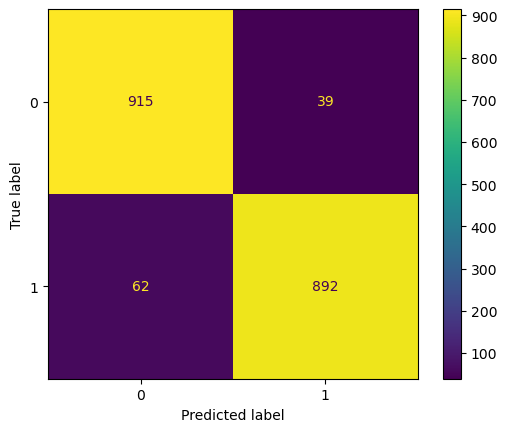

In [31]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

lgbm = LGBMClassifier(random_state=random_seed)
lgbm.fit(X_train_transformed, y_train_transformed)
print('Accuracy of LGBM classifier on training set: {:.4f}'.format(lgbm.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LGBM classifier on test set: {:.4f}'.format(lgbm.score(X_test_transformed, y_test_transformed)))

pred = lgbm.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, lgbm.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm.classes_)
disp.plot()

plt.show()


#### Hold-out set

Accuracy of LGBM classifier on hold-out set: 0.9434
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       530
           1       0.96      0.93      0.94       530

    accuracy                           0.94      1060
   macro avg       0.94      0.94      0.94      1060
weighted avg       0.94      0.94      0.94      1060



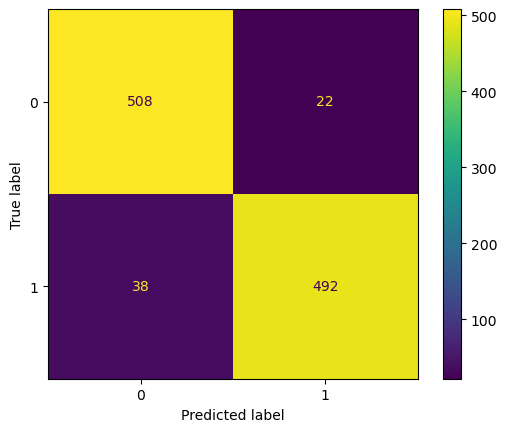

In [32]:
print('Accuracy of LGBM classifier on hold-out set: {:.4f}'.format(lgbm.score(X_holdout_transformed, y_holdout_transformed)))

pred = lgbm.predict(X_holdout_transformed)

print(classification_report(y_holdout_transformed, pred))

cm = confusion_matrix(y_holdout_transformed, lgbm.predict(X_holdout_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm.classes_)
disp.plot()

plt.show()




In [33]:
acc_train1_LBGM = lgbm.score(X_train_transformed, y_train_transformed)
acc_test1_LBGM = lgbm.score(X_test_transformed, y_test_transformed)
acc_holdout1_LBGM = lgbm.score(X_holdout_transformed, y_holdout_transformed)

#### Grid search for hyperparameter tuning

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = {'num_leaves': [31, 63, 127],
              'learning_rate': [0.1, 0.01, 0.001],
              'n_estimators': [100, 500, 1000]
             }

In [36]:
grid_search = GridSearchCV(lgbm, param_grid, cv=5)
grid_search.fit(X_train_transformed, y_train_transformed)

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 500, 1000],
                         'num_leaves': [31, 63, 127]})

In [37]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31}


In [38]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.28,0.12,0.00,0.00,0.1,100,31,"{'learning_rate': 0.1, 'n_estimators': 100, 'n...",0.94,0.94,0.95,0.95,0.94,0.94,0.00,1
1,0.32,0.01,0.00,0.00,0.1,100,63,"{'learning_rate': 0.1, 'n_estimators': 100, 'n...",0.94,0.94,0.94,0.94,0.94,0.94,0.00,2
4,2.18,0.82,0.03,0.01,0.1,500,63,"{'learning_rate': 0.1, 'n_estimators': 500, 'n...",0.94,0.94,0.94,0.95,0.94,0.94,0.00,3


In [39]:
# grid_search.predict(x_test)

#### Cross validation

In [40]:
# from sklearn.model_selection import GridSearchCV, cross_val_score
# # Perform cross-validation after grid search
# scores = cross_val_score(grid_search, X_test_transformed, y_test_transformed, cv=10)
# print("Cross-validation scores: ", scores)
# print("Mean accuracy: ", scores.mean())

#### Re-run model

Accuracy of LBGM classifier on training set: 0.9849
Accuracy of LBGM classifier on test set: 0.9471
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       954
           1       0.96      0.94      0.95       954

    accuracy                           0.95      1908
   macro avg       0.95      0.95      0.95      1908
weighted avg       0.95      0.95      0.95      1908



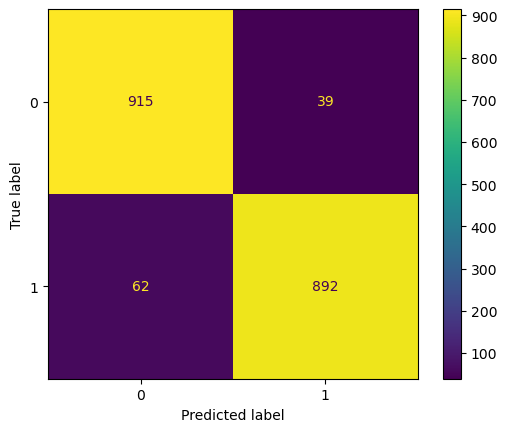

In [41]:
print('Accuracy of LBGM classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LBGM classifier on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

#### Rerun hold-out set

Accuracy of LGBM classifier on hold-out set: 0.9434
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       530
           1       0.96      0.93      0.94       530

    accuracy                           0.94      1060
   macro avg       0.94      0.94      0.94      1060
weighted avg       0.94      0.94      0.94      1060



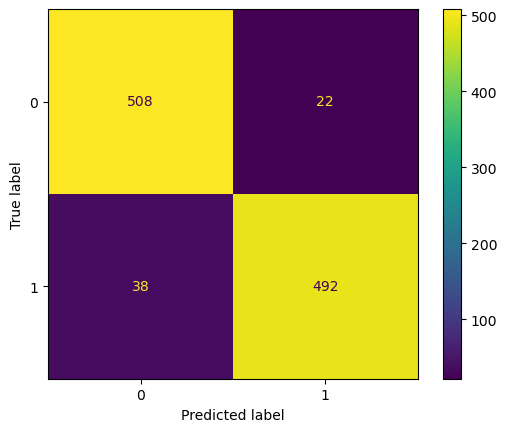

In [42]:
print('Accuracy of LGBM classifier on hold-out set: {:.4f}'.format(grid_search.score(X_holdout_transformed, y_holdout_transformed)))

pred = grid_search.predict(X_holdout_transformed)

print(classification_report(y_holdout_transformed, pred))

cm = confusion_matrix(y_holdout_transformed, grid_search.predict(X_holdout_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()




In [43]:
acc_train2_LBGM = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_LBGM = grid_search.score(X_test_transformed, y_test_transformed)
acc_holdout2_LBGM = grid_search.score(X_holdout_transformed, y_holdout_transformed)

#### Feature importance

In [44]:
importances = lgbm.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
feature_names = data_resampled.columns[1:]
names = [feature_names[i] for i in indices]

importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# Sort the dataframe by importance
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Print the top 10 features
print(importance_df.head(10))

fi_LGBM = importance_df

    feature_name  importance
24     Curvature         426
33   Ellipticity         267
22        Extent         210
13     L/T Ratio         175
23  Transparency         144
35   Fiber Width         131
36    type_micro         126
4        ELength         112
12    Sphericity         112
25  Surface Area         108


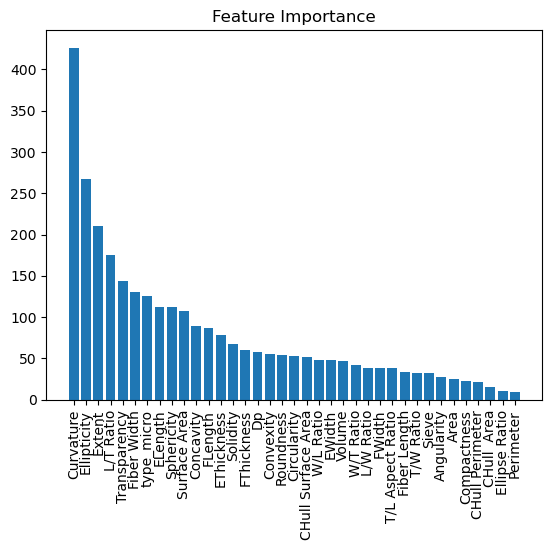

In [45]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

### AdaBoost (Adaptive Boosting)

#### Train-test split

In [46]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_holdout, y_train, y_holdout = train_test_split(features, target, test_size=0.1, stratify=target, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)


In [47]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [48]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [49]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)
X_holdout_transformed = scale.transform(X_holdout)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
y_holdout_transformed = le.transform(y_holdout)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of LGBM classifier on training set: 0.9100
Accuracy of LGBM classifier on test set: 0.9151
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       954
           1       0.93      0.90      0.91       954

    accuracy                           0.92      1908
   macro avg       0.92      0.92      0.92      1908
weighted avg       0.92      0.92      0.92      1908



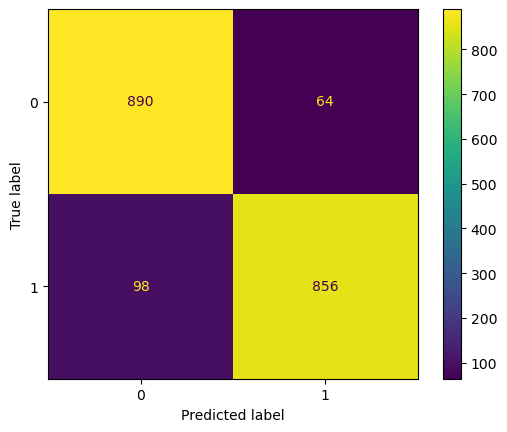

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

ada = AdaBoostClassifier(random_state=random_seed)
ada.fit(X_train_transformed, y_train_transformed)
print('Accuracy of LGBM classifier on training set: {:.4f}'.format(ada.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LGBM classifier on test set: {:.4f}'.format(ada.score(X_test_transformed, y_test_transformed)))

pred = ada.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, ada.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada.classes_)
disp.plot()

plt.show()

#### Hold-out set

Accuracy of LGBM classifier on hold-out set: 0.9170
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       530
           1       0.93      0.91      0.92       530

    accuracy                           0.92      1060
   macro avg       0.92      0.92      0.92      1060
weighted avg       0.92      0.92      0.92      1060



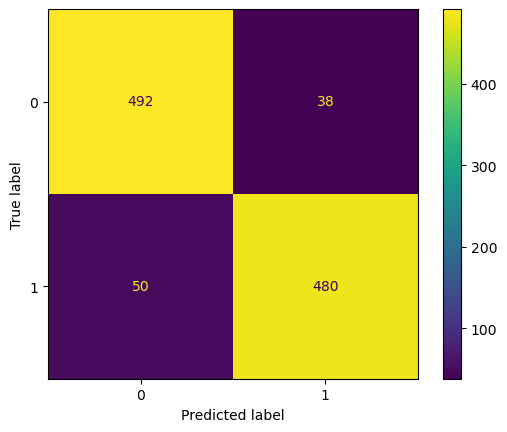

In [51]:
print('Accuracy of LGBM classifier on hold-out set: {:.4f}'.format(ada.score(X_holdout_transformed, y_holdout_transformed)))

pred = ada.predict(X_holdout_transformed)

print(classification_report(y_holdout_transformed, pred))

cm = confusion_matrix(y_holdout_transformed, ada.predict(X_holdout_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada.classes_)
disp.plot()

plt.show()




In [52]:
acc_train1_ada = ada.score(X_train_transformed, y_train_transformed)
acc_test1_ada = ada.score(X_test_transformed, y_test_transformed)
acc_holdout1_ada = ada.score(X_holdout_transformed, y_holdout_transformed)

#### Cross validation for hyperparameter tuning

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
param_grid = {'n_estimators': [50, 100, 150],
              'learning_rate': [0.1, 0.5, 1.0],
              'algorithm': ['SAMME', 'SAMME.R']}

In [55]:
grid_search = GridSearchCV(ada, param_grid, cv=5)
grid_search.fit(X_train_transformed, y_train_transformed)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 150]})

In [56]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 150}


In [57]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,1.99,0.05,0.05,0.02,SAMME.R,1.0,150,"{'algorithm': 'SAMME.R', 'learning_rate': 1.0,...",0.93,0.91,0.92,0.91,0.92,0.92,0.01,1
16,1.32,0.03,0.03,0.00,SAMME.R,1.0,100,"{'algorithm': 'SAMME.R', 'learning_rate': 1.0,...",0.92,0.91,0.91,0.90,0.91,0.91,0.01,2
14,1.98,0.04,0.05,0.00,SAMME.R,0.5,150,"{'algorithm': 'SAMME.R', 'learning_rate': 0.5,...",0.92,0.91,0.91,0.90,0.91,0.91,0.00,3


In [58]:
# grid_search.predict(x_test)

#### Re-run model

Accuracy of AdaBoost classifier on training set: 0.9262
Accuracy of AdaBoost classifier on test set: 0.9261
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       954
           1       0.94      0.91      0.92       954

    accuracy                           0.93      1908
   macro avg       0.93      0.93      0.93      1908
weighted avg       0.93      0.93      0.93      1908



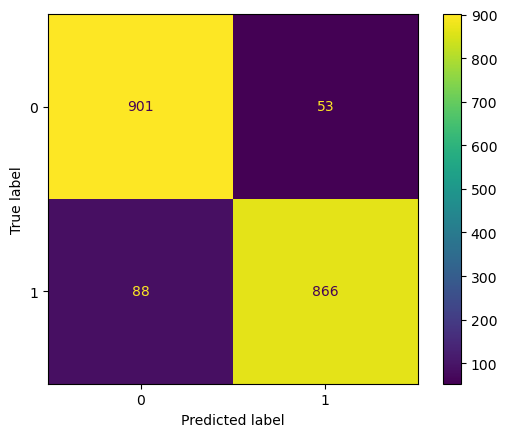

In [59]:
print('Accuracy of AdaBoost classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of AdaBoost classifier on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

#### Rerun hold-out set

Accuracy of LGBM classifier on hold-out set: 0.9245
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       530
           1       0.94      0.91      0.92       530

    accuracy                           0.92      1060
   macro avg       0.92      0.92      0.92      1060
weighted avg       0.92      0.92      0.92      1060



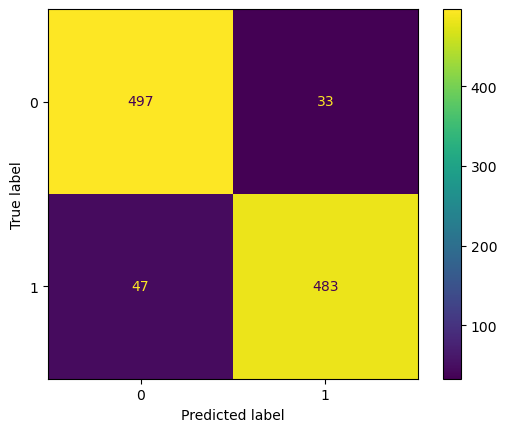

In [60]:
print('Accuracy of LGBM classifier on hold-out set: {:.4f}'.format(grid_search.score(X_holdout_transformed, y_holdout_transformed)))

pred = grid_search.predict(X_holdout_transformed)

print(classification_report(y_holdout_transformed, pred))

cm = confusion_matrix(y_holdout_transformed, grid_search.predict(X_holdout_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()




In [61]:
acc_train2_ada = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_ada = grid_search.score(X_test_transformed, y_test_transformed)
acc_holdout2_ada = grid_search.score(X_holdout_transformed, y_holdout_transformed)

#### Feature importance

In [62]:
importances = ada.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
feature_names = data_resampled.columns[1:]
names = [feature_names[i] for i in indices]

importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# Sort the dataframe by importance
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Print the top 10 features
print(importance_df.head(10))

fi_ada = importance_df

    feature_name  importance
24     Curvature        0.22
22        Extent        0.10
33   Ellipticity        0.10
25  Surface Area        0.08
19      Solidity        0.06
13     L/T Ratio        0.04
2        FLength        0.04
35   Fiber Width        0.04
4        ELength        0.04
26     L/W Ratio        0.04


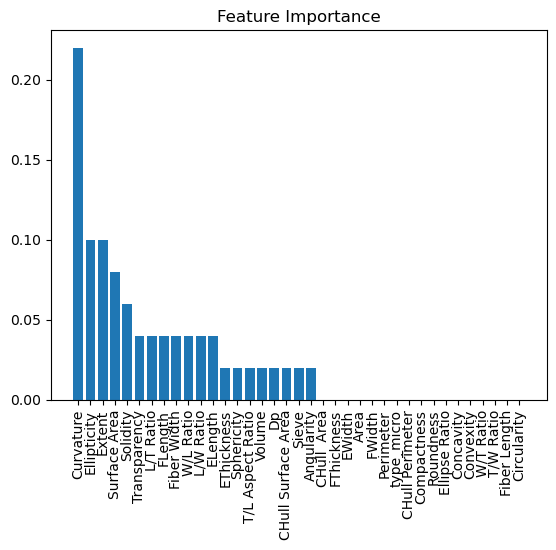

In [63]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

### Random forest

#### Train-test split

In [64]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_holdout, y_train, y_holdout = train_test_split(features, target, test_size=0.1, stratify=target, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)


In [65]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [66]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [67]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)
X_holdout_transformed = scale.transform(X_holdout)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
y_holdout_transformed = le.transform(y_holdout)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of RF classifier on training set: 0.9928
Accuracy of RF classifier on test set: 0.9387
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       954
           1       0.96      0.92      0.94       954

    accuracy                           0.94      1908
   macro avg       0.94      0.94      0.94      1908
weighted avg       0.94      0.94      0.94      1908



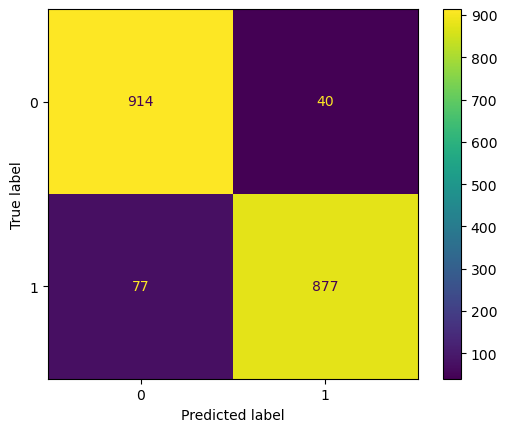

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed =10

rf = RandomForestClassifier(random_state=random_seed)
rf.fit(X_train_transformed, y_train_transformed)
print('Accuracy of RF classifier on training set: {:.4f}'.format(rf.score(X_train_transformed, y_train_transformed)))
print('Accuracy of RF classifier on test set: {:.4f}'.format(rf.score(X_test_transformed, y_test_transformed)))

pred = rf.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, rf.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

plt.show()

#### Hold-out set

Accuracy of LGBM classifier on hold-out set: 0.9434
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       530
           1       0.97      0.92      0.94       530

    accuracy                           0.94      1060
   macro avg       0.94      0.94      0.94      1060
weighted avg       0.94      0.94      0.94      1060



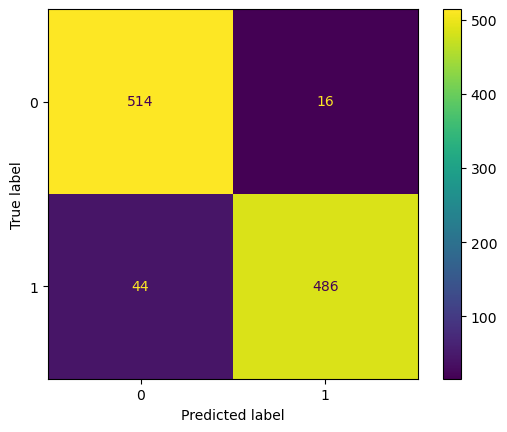

In [69]:
print('Accuracy of LGBM classifier on hold-out set: {:.4f}'.format(rf.score(X_holdout_transformed, y_holdout_transformed)))

pred = rf.predict(X_holdout_transformed)

print(classification_report(y_holdout_transformed, pred))

cm = confusion_matrix(y_holdout_transformed, rf.predict(X_holdout_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

plt.show()




In [70]:
acc_train1_rf = rf.score(X_train_transformed, y_train_transformed)
acc_test1_rf = rf.score(X_test_transformed, y_test_transformed)
acc_holdout1_rf = rf.score(X_holdout_transformed, y_holdout_transformed)

#### Grid Search for hyperparameter tuning

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}
#               'min_samples_leaf': [1, 2, 4],
#               'max_features': ['auto', 'sqrt', 'log2'],
#               'max_leaf_nodes': [10, 20, 30],
#               'class_weight':[None, 'balanced'],
#               'criterion': ['gini', 'entropy']}

In [73]:
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_test_transformed, y_test_transformed)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [74]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


In [75]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.17,0.00,0.01,0.00,None,5,50,"{'max_depth': None, 'min_samples_split': 5, 'n...",0.93,0.94,0.92,0.93,0.89,0.92,0.02,1
5,0.34,0.00,0.01,0.00,None,5,100,"{'max_depth': None, 'min_samples_split': 5, 'n...",0.93,0.93,0.91,0.93,0.90,0.92,0.01,2
7,0.17,0.00,0.01,0.00,None,10,50,"{'max_depth': None, 'min_samples_split': 10, '...",0.93,0.93,0.91,0.92,0.90,0.92,0.01,3


#### Cross validation

In [76]:
# from sklearn.model_selection import GridSearchCV, cross_val_score
# # Perform cross-validation after grid search
# scores = cross_val_score(grid_search, X_test_transformed, y_test_transformed, cv=10)
# print("Cross-validation scores: ", scores)
# print("Mean accuracy: ", scores.mean())

#### Re-run model

Accuracy of Random Forest classifier on training set: 0.9182
Accuracy of Random Forest classifier on test set: 0.9895
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       1.00      0.98      0.99       954

    accuracy                           0.99      1908
   macro avg       0.99      0.99      0.99      1908
weighted avg       0.99      0.99      0.99      1908



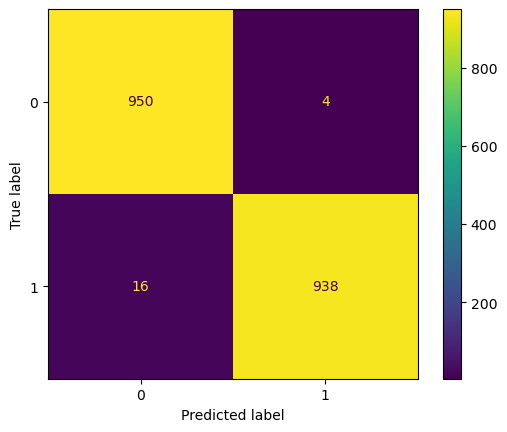

In [77]:
print('Accuracy of Random Forest classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of Random Forest classifier on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

#### Rerun hold-out set

Accuracy of LGBM classifier on hold-out set: 0.9179
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       530
           1       0.94      0.89      0.92       530

    accuracy                           0.92      1060
   macro avg       0.92      0.92      0.92      1060
weighted avg       0.92      0.92      0.92      1060



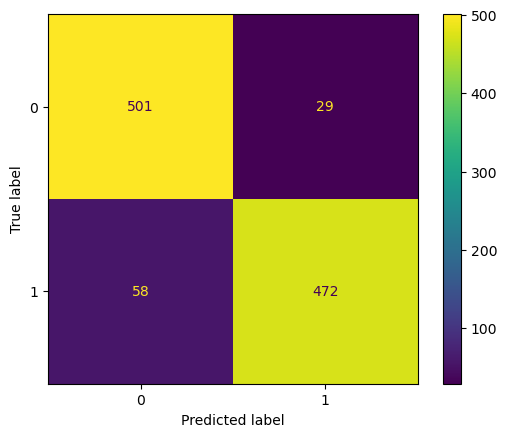

In [78]:
print('Accuracy of LGBM classifier on hold-out set: {:.4f}'.format(grid_search.score(X_holdout_transformed, y_holdout_transformed)))

pred = grid_search.predict(X_holdout_transformed)

print(classification_report(y_holdout_transformed, pred))

cm = confusion_matrix(y_holdout_transformed, grid_search.predict(X_holdout_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [79]:
acc_train2_rf = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_rf = grid_search.score(X_test_transformed, y_test_transformed)
acc_holdout2_rf = grid_search.score(X_holdout_transformed, y_holdout_transformed)

#### Plot trees

In [80]:
# !pip install pydot

In [81]:
# import os
# from sklearn.tree import export_graphviz
# import six
# import pydot
# from sklearn import tree
# dotfile = six.StringIO()
# i_tree = 0
# for tree_in_forest in rf.estimators_:
#     export_graphviz(tree_in_forest,out_file='tree.dot',
#     feature_names=micro.columns[:-1],
#     filled=True,
#     rounded=True)
#     (graph,) = pydot.graph_from_dot_file('tree.dot')
#     name = 'tree' + str(i_tree)
#     graph.write_png(name+  '.png')
#     os.system('dot -Tpng tree.dot -o tree.png')
#     i_tree +=1

In [82]:
# clf = RandomForestClassifier(**best_params_, random_state=random_seed)
# clf.fit(X_train_transformed, y_train_transformed)
# # Plot the first tree of the forest
# plt.figure(figsize=(20,15))
# tree = clf.estimators_[0]
# plot_tree(tree, filled=True, rounded=True, class_names=['Soil', 'Lithic'])
# plt.show()

In [83]:
# rf = RandomForestClassifier('max_depth'=None,
#                             'n_estimators': 100,
#                             'min_samples_split': 5, 
#                             random_state=10)
# rf.estimators_[index]

# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree

# fig = plt.figure(figsize=(15, 10))
# plot_tree(rf.estimators_[0], 
#           feature_names=micro.feature_names,
#           class_names=micro.target_names, 
#           filled=True, impurity=True, 
#           rounded=True)

#### Feature importance

In [84]:
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
feature_names = data_resampled.columns[1:]
names = [feature_names[i] for i in indices]

importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# Sort the dataframe by importance
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Print the top 10 features
print(importance_df.head(10))

fi_rf = importance_df

          feature_name  importance
29           T/W Ratio        0.12
30  CHull Surface Area        0.11
24           Curvature        0.08
25        Surface Area        0.06
7               Volume        0.05
33         Ellipticity        0.05
19            Solidity        0.04
13           L/T Ratio        0.04
27           W/L Ratio        0.03
28           W/T Ratio        0.03


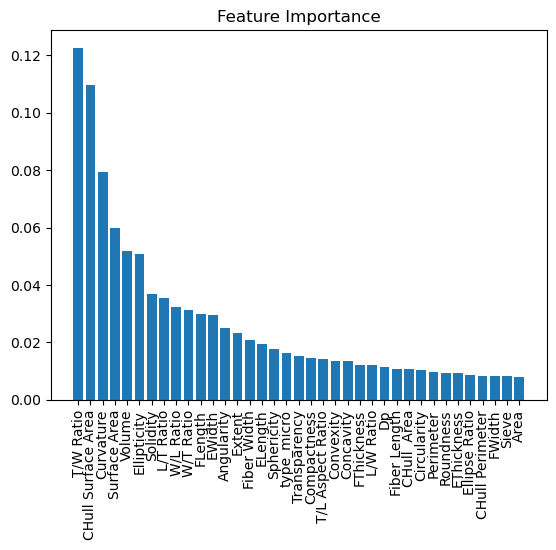

In [85]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

### Bagging (Bootstrapped Aggregation)

#### Train-test split

In [86]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_holdout, y_train, y_holdout = train_test_split(features, target, test_size=0.1, stratify=target, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)


In [87]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [88]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [89]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)
X_holdout_transformed = scale.transform(X_holdout)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
y_holdout_transformed = le.transform(y_holdout)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of LGBM classifier on training set: 0.9172
Accuracy of LGBM classifier on test set: 0.9057
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       954
           1       0.92      0.88      0.90       954

    accuracy                           0.91      1908
   macro avg       0.91      0.91      0.91      1908
weighted avg       0.91      0.91      0.91      1908



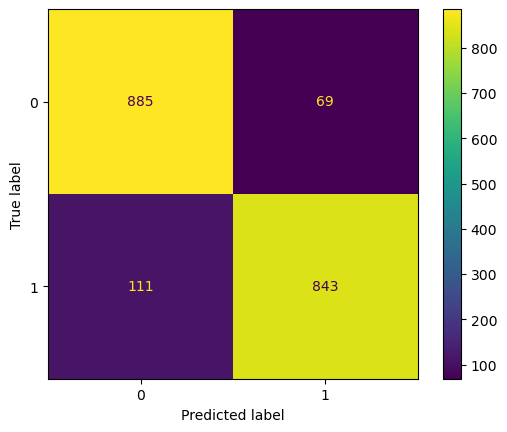

In [90]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

base_estimator = DecisionTreeClassifier(max_depth=4, random_state=random_seed)
bagging = BaggingClassifier(base_estimator=base_estimator, random_state=random_seed)
bagging.fit(X_train_transformed, y_train_transformed)
print('Accuracy of LGBM classifier on training set: {:.4f}'.format(bagging.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LGBM classifier on test set: {:.4f}'.format(bagging.score(X_test_transformed, y_test_transformed)))

pred = bagging.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, bagging.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bagging.classes_)
disp.plot()

plt.show()

#### Hold-out set

Accuracy of LGBM classifier on hold-out set: 0.9094
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       530
           1       0.93      0.89      0.91       530

    accuracy                           0.91      1060
   macro avg       0.91      0.91      0.91      1060
weighted avg       0.91      0.91      0.91      1060



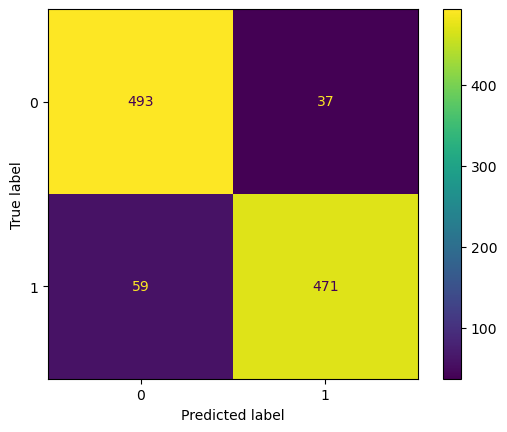

In [91]:
print('Accuracy of LGBM classifier on hold-out set: {:.4f}'.format(bagging.score(X_holdout_transformed, y_holdout_transformed)))

pred = bagging.predict(X_holdout_transformed)

print(classification_report(y_holdout_transformed, pred))

cm = confusion_matrix(y_holdout_transformed, bagging.predict(X_holdout_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bagging.classes_)
disp.plot()

plt.show()




In [92]:
acc_train1_bagging = bagging.score(X_train_transformed, y_train_transformed)
acc_test1_bagging = bagging.score(X_test_transformed, y_test_transformed)
acc_holdout1_bagging = bagging.score(X_holdout_transformed, y_holdout_transformed)

#### Cross validation for hyperparameter tuning

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
param_grid = {'n_estimators': [50, 100, 150],
              'max_samples': [0.5, 1.0, 2.0],
              'max_features': [0.5, 1.0, 2.0]}

In [95]:
grid_search = GridSearchCV(bagging, param_grid, cv=5)
grid_search.fit(X_train_transformed, y_train_transformed)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                                               random_state=42),
                                         random_state=42),
             param_grid={'max_features': [0.5, 1.0, 2.0],
                         'max_samples': [0.5, 1.0, 2.0],
                         'n_estimators': [50, 100, 150]})

In [96]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 150}


In [97]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,3.15,0.02,0.05,0.00,1.0,0.5,150,"{'max_features': 1.0, 'max_samples': 0.5, 'n_e...",0.92,0.92,0.92,0.91,0.91,0.91,0.01,1
10,2.17,0.07,0.03,0.00,1.0,0.5,100,"{'max_features': 1.0, 'max_samples': 0.5, 'n_e...",0.91,0.92,0.91,0.91,0.91,0.91,0.00,2
13,3.09,0.01,0.03,0.00,1.0,1.0,100,"{'max_features': 1.0, 'max_samples': 1.0, 'n_e...",0.91,0.92,0.92,0.91,0.90,0.91,0.01,3


In [98]:
# grid_search.predict(x_test)

#### Re-run model

Accuracy of Bagging classifier on training set: 0.9224
Accuracy of Bagging classifie on test set: 0.9104
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       954
           1       0.92      0.89      0.91       954

    accuracy                           0.91      1908
   macro avg       0.91      0.91      0.91      1908
weighted avg       0.91      0.91      0.91      1908



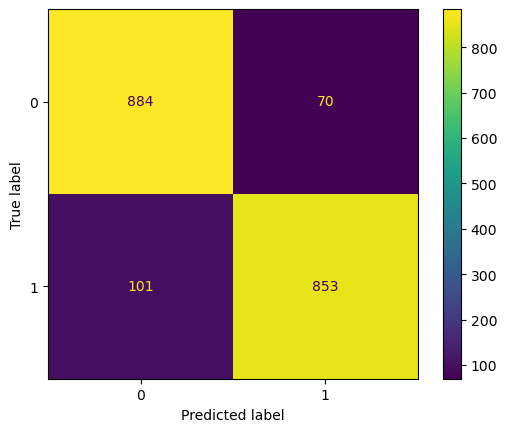

In [99]:
print('Accuracy of Bagging classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of Bagging classifie on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

#### Rerun hold-out set

Accuracy of LGBM classifier on hold-out set: 0.9179
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       530
           1       0.93      0.91      0.92       530

    accuracy                           0.92      1060
   macro avg       0.92      0.92      0.92      1060
weighted avg       0.92      0.92      0.92      1060



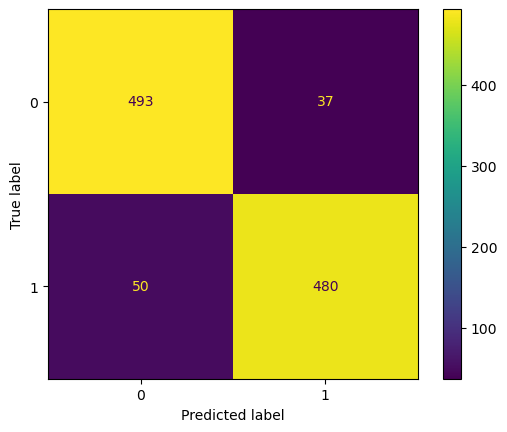

In [100]:
print('Accuracy of LGBM classifier on hold-out set: {:.4f}'.format(grid_search.score(X_holdout_transformed, y_holdout_transformed)))

pred = grid_search.predict(X_holdout_transformed)

print(classification_report(y_holdout_transformed, pred))

cm = confusion_matrix(y_holdout_transformed, grid_search.predict(X_holdout_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()




In [101]:
acc_train2_bagging = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_bagging = grid_search.score(X_test_transformed, y_test_transformed)
acc_holdout2_bagging = grid_search.score(X_holdout_transformed, y_holdout_transformed)

#### Feature importance

In [102]:
# importances = bagging.feature_importances_

# # Sort the feature importances in descending order
# indices = np.argsort(importances)[::-1]
# feature_names = data_resampled.columns[1:]
# names = [feature_names[i] for i in indices]

# importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# # Sort the dataframe by importance
# importance_df.sort_values(by='importance', ascending=False, inplace=True)

# # Print the top 10 features
# print(importance_df.head(10))

# fi_bagging = importance_df

In [103]:
# # Create plot
# plt.figure()

# # Create plot title
# plt.title("Feature Importance")

# # Add bars
# plt.bar(range(X_train.shape[1]), importances[indices])

# # Add feature names as x-axis labels
# plt.xticks(range(X_train.shape[1]), names, rotation=90)

# # Show plot
# plt.show()

### Extra trees

#### Train-test split

In [104]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_holdout, y_train, y_holdout = train_test_split(features, target, test_size=0.1, stratify=target, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)


In [105]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [106]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [107]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)
X_holdout_transformed = scale.transform(X_holdout)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
y_holdout_transformed = le.transform(y_holdout)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of Extra Trees classifier on training set: 0.9928
Accuracy of Extra Trees classifier on test set: 0.9193
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       954
           1       0.94      0.89      0.92       954

    accuracy                           0.92      1908
   macro avg       0.92      0.92      0.92      1908
weighted avg       0.92      0.92      0.92      1908



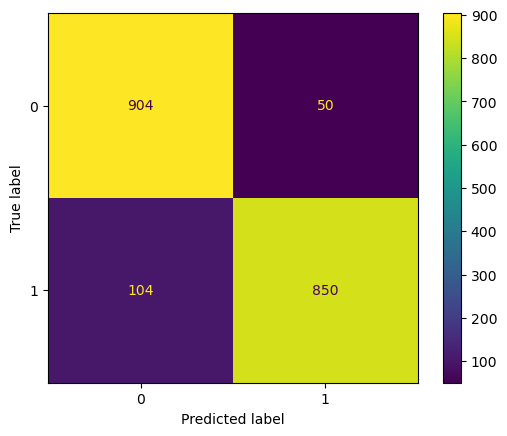

In [108]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

etree = ExtraTreesClassifier(random_state=random_seed)
etree.fit(X_train_transformed, y_train_transformed)
print('Accuracy of Extra Trees classifier on training set: {:.4f}'.format(etree.score(X_train_transformed, y_train_transformed)))
print('Accuracy of Extra Trees classifier on test set: {:.4f}'.format(etree.score(X_test_transformed, y_test_transformed)))

pred = etree.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, etree.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=etree.classes_)
disp.plot()

plt.show()

#### Hold-out set

Accuracy of LGBM classifier on hold-out set: 0.9264
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       530
           1       0.95      0.90      0.92       530

    accuracy                           0.93      1060
   macro avg       0.93      0.93      0.93      1060
weighted avg       0.93      0.93      0.93      1060



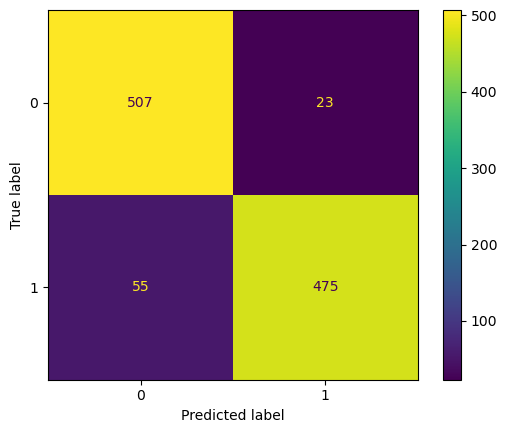

In [109]:
print('Accuracy of LGBM classifier on hold-out set: {:.4f}'.format(etree.score(X_holdout_transformed, y_holdout_transformed)))

pred = etree.predict(X_holdout_transformed)

print(classification_report(y_holdout_transformed, pred))

cm = confusion_matrix(y_holdout_transformed, etree.predict(X_holdout_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=etree.classes_)
disp.plot()

plt.show()




In [110]:
acc_train1_etree = etree.score(X_train_transformed, y_train_transformed)
acc_test1_etree = etree.score(X_test_transformed, y_test_transformed)
acc_holdout1_etree = etree.score(X_holdout_transformed, y_holdout_transformed)

#### Cross validation for hyperparameter tuning

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
param_grid = {'n_estimators': [10, 50, 100, 150],
              'max_depth': [None, 5, 10, 20],
              'min_samples_split': [2, 5, 10]}

In [113]:
grid_search = GridSearchCV(etree, param_grid, cv=5)
grid_search.fit(X_test_transformed, y_test_transformed)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 150]})

In [114]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}


In [115]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.24,0.01,0.02,0.00,None,5,150,"{'max_depth': None, 'min_samples_split': 5, 'n...",0.92,0.90,0.92,0.91,0.90,0.91,0.01,1
4,0.02,0.00,0.00,0.00,None,5,10,"{'max_depth': None, 'min_samples_split': 5, 'n...",0.91,0.90,0.92,0.91,0.90,0.91,0.01,2
42,0.15,0.00,0.01,0.00,20,5,100,"{'max_depth': 20, 'min_samples_split': 5, 'n_e...",0.92,0.90,0.92,0.92,0.90,0.91,0.01,2


#### Re-run model

Accuracy of Extra Trees classifier on training set: 0.9125
Accuracy of Extra Trees classifier on test set: 0.9942
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       954
           1       1.00      0.99      0.99       954

    accuracy                           0.99      1908
   macro avg       0.99      0.99      0.99      1908
weighted avg       0.99      0.99      0.99      1908



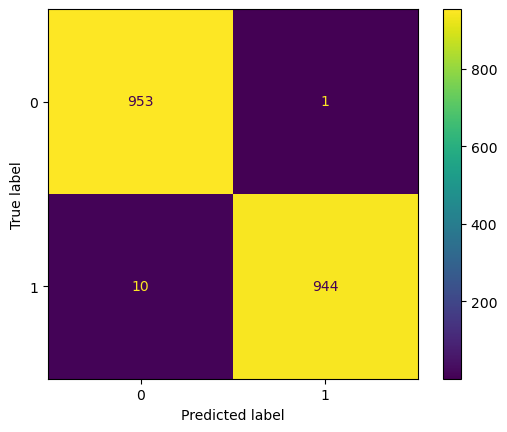

In [116]:
print('Accuracy of Extra Trees classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of Extra Trees classifier on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

#### Rerun hold-out set

Accuracy of Extra Tree classifier on hold-out set: 0.9113
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       530
           1       0.94      0.88      0.91       530

    accuracy                           0.91      1060
   macro avg       0.91      0.91      0.91      1060
weighted avg       0.91      0.91      0.91      1060



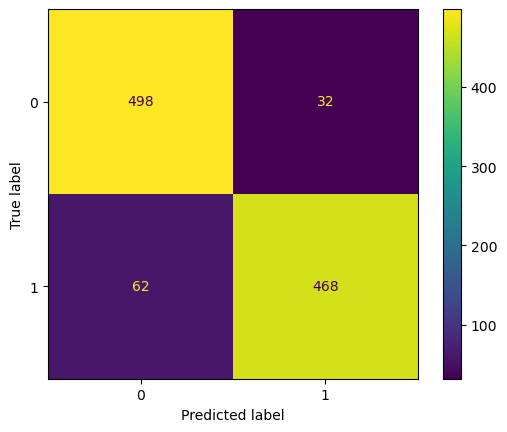

In [117]:
print('Accuracy of Extra Tree classifier on hold-out set: {:.4f}'.format(grid_search.score(X_holdout_transformed, y_holdout_transformed)))

pred = grid_search.predict(X_holdout_transformed)

print(classification_report(y_holdout_transformed, pred))

cm = confusion_matrix(y_holdout_transformed, grid_search.predict(X_holdout_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()




In [118]:
acc_train2_etree = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_etree = grid_search.score(X_test_transformed, y_test_transformed)
acc_holdout2_etree = grid_search.score(X_holdout_transformed, y_holdout_transformed)

#### Feature importance

In [119]:
importances = etree.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
feature_names = data_resampled.columns[1:]
names = [feature_names[i] for i in indices]

importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# Sort the dataframe by importance
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Print the top 10 features
print(importance_df.head(10))

fi_etree = importance_df

          feature_name  importance
30  CHull Surface Area        0.12
29           T/W Ratio        0.08
19            Solidity        0.07
28           W/T Ratio        0.07
24           Curvature        0.06
33         Ellipticity        0.06
27           W/L Ratio        0.05
13           L/T Ratio        0.05
22              Extent        0.03
25        Surface Area        0.03


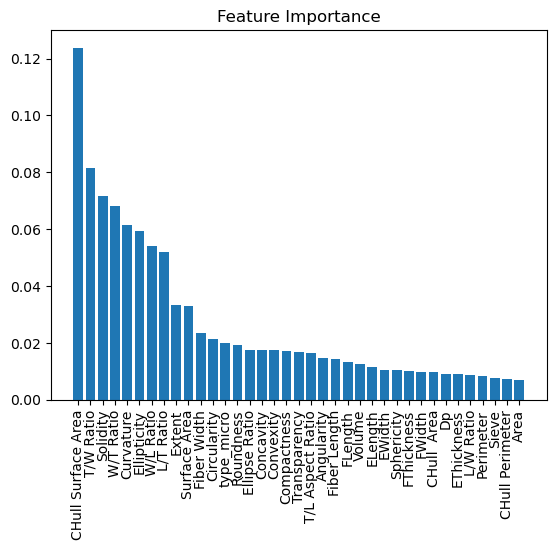

In [120]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

### SVC (Support Vector Classification)

#### Train-test split

In [121]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_holdout, y_train, y_holdout = train_test_split(features, target, test_size=0.1, stratify=target, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)


In [122]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [123]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [124]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)
X_holdout_transformed = scale.transform(X_holdout)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
y_holdout_transformed = le.transform(y_holdout)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of LR classifier on training set: 0.9305
Accuracy of LR classifier on test set: 0.9245
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       954
           1       0.96      0.88      0.92       954

    accuracy                           0.92      1908
   macro avg       0.93      0.92      0.92      1908
weighted avg       0.93      0.92      0.92      1908



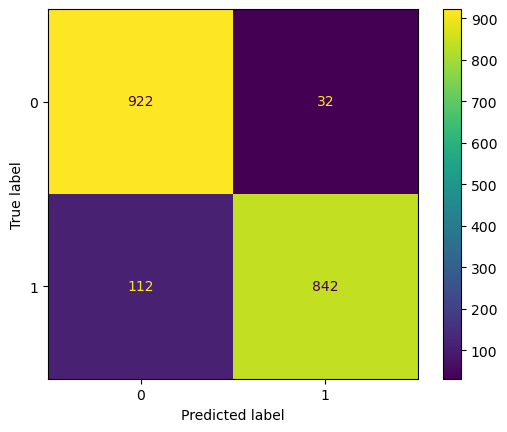

In [125]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

svc = SVC(random_state=random_seed)
svc.fit(X_train_transformed, y_train_transformed)
print('Accuracy of LR classifier on training set: {:.4f}'.format(svc.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LR classifier on test set: {:.4f}'.format(svc.score(X_test_transformed, y_test_transformed)))

pred = svc.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, svc.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()

plt.show()

#### Hold-out set

Accuracy of SVC classifier on hold-out set: 0.9264
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       530
           1       0.97      0.88      0.92       530

    accuracy                           0.93      1060
   macro avg       0.93      0.93      0.93      1060
weighted avg       0.93      0.93      0.93      1060



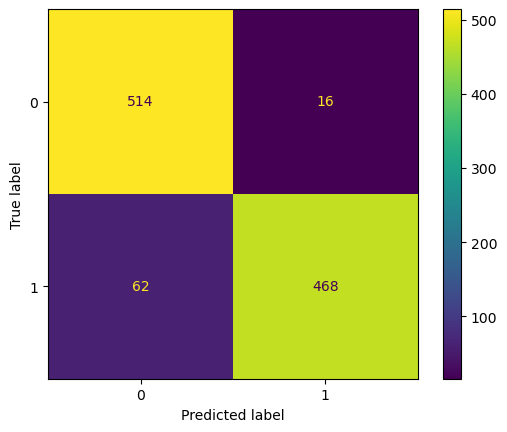

In [126]:
print('Accuracy of SVC classifier on hold-out set: {:.4f}'.format(svc.score(X_holdout_transformed, y_holdout_transformed)))

pred = svc.predict(X_holdout_transformed)

print(classification_report(y_holdout_transformed, pred))

cm = confusion_matrix(y_holdout_transformed, svc.predict(X_holdout_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()

plt.show()




In [127]:
acc_train1_svc = svc.score(X_train_transformed, y_train_transformed)
acc_test1_svc = svc.score(X_test_transformed, y_test_transformed)
acc_holdout1_svc = svc.score(X_holdout_transformed, y_holdout_transformed)

#### Cross validation for hyperparameter tuning

In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': [0.01, 0.1, 1]}

In [130]:
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_test_transformed, y_test_transformed)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [131]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [132]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
22,0.04,0.00,0.03,0.00,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.93,0.92,0.94,0.94,0.93,0.93,0.01,1
19,0.05,0.01,0.03,0.01,10,0.01,rbf,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.92,0.91,0.93,0.93,0.91,0.92,0.01,2
13,0.04,0.00,0.03,0.00,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.92,0.91,0.93,0.92,0.91,0.92,0.01,3


In [133]:
# grid_search.predict(x_test)

#### Re-run model

Accuracy of SV classifier on training set: 0.9287
Accuracy of SV classifie on test set: 0.9612
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       954
           1       0.98      0.95      0.96       954

    accuracy                           0.96      1908
   macro avg       0.96      0.96      0.96      1908
weighted avg       0.96      0.96      0.96      1908



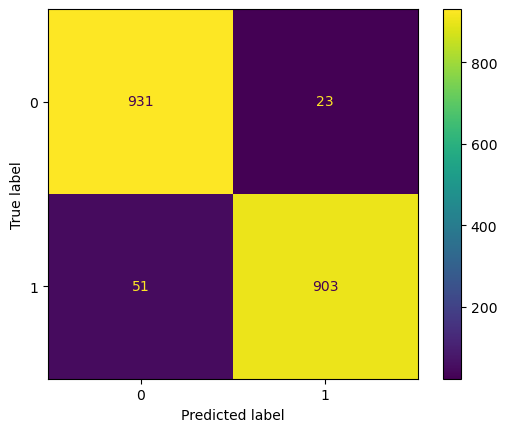

In [134]:
print('Accuracy of SV classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of SV classifie on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

#### Rerun hold-out set

Accuracy of SVC classifier on hold-out set: 0.9406
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       530
           1       0.96      0.92      0.94       530

    accuracy                           0.94      1060
   macro avg       0.94      0.94      0.94      1060
weighted avg       0.94      0.94      0.94      1060



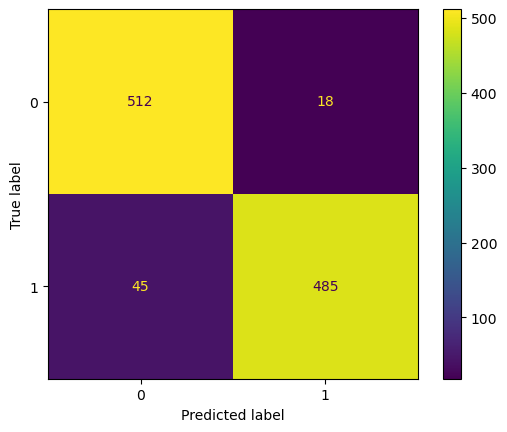

In [135]:
print('Accuracy of SVC classifier on hold-out set: {:.4f}'.format(grid_search.score(X_holdout_transformed, y_holdout_transformed)))

pred = grid_search.predict(X_holdout_transformed)

print(classification_report(y_holdout_transformed, pred))

cm = confusion_matrix(y_holdout_transformed, grid_search.predict(X_holdout_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()




In [136]:
acc_train2_svc = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_svc = grid_search.score(X_test_transformed, y_test_transformed)
acc_holdout2_svc = grid_search.score(X_holdout_transformed, y_holdout_transformed)

#### Feature importance

In [137]:
# importances = svc.feature_importances_

# # Sort the feature importances in descending order
# indices = np.argsort(importances)[::-1]
# feature_names = data_resampled.columns[1:]
# names = [feature_names[i] for i in indices]

# importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# # Sort the dataframe by importance
# importance_df.sort_values(by='importance', ascending=False, inplace=True)

# # Print the top 10 features
# print(importance_df.head(10))

# fi_svc = importance_df

In [138]:
# # Create plot
# plt.figure()

# # Create plot title
# plt.title("Feature Importance")

# # Add bars
# plt.bar(range(X_train.shape[1]), importances[indices])

# # Add feature names as x-axis labels
# plt.xticks(range(X_train.shape[1]), names, rotation=90)

# # Show plot
# plt.show()

In [139]:
### XGBoost

In [140]:
### Gradient Boosting

## Visualizations

### Model accuracies

In [141]:
df = {'model': ['LightGBM', 'AdaBoost', 'Random Forest', 'Bagging', 'Extra Trees', 'SVC'], 
            'train_accuracy': [acc_train1_LBGM, acc_train1_ada, acc_train1_rf, acc_train1_bagging, acc_train1_etree, acc_train1_svc], 
            'test_accuracy': [acc_test1_LBGM, acc_test1_ada, acc_test1_rf, acc_test1_bagging, acc_test1_etree, acc_test1_svc],
            'holdout_accuracy': [acc_holdout1_LBGM, acc_holdout1_ada, acc_holdout1_rf, acc_holdout1_bagging, acc_holdout1_etree, acc_holdout1_svc],
            'train_accuracy_CV': [acc_train2_LBGM, acc_train2_ada, acc_train2_rf, acc_train2_bagging, acc_train2_etree, acc_train2_svc], 
            'test_accuracy_CV': [acc_test2_LBGM, acc_test2_ada, acc_test2_rf, acc_test2_bagging, acc_test1_etree, acc_test2_svc],
            'holdout_accuracy_CV': [acc_holdout2_LBGM, acc_holdout2_ada, acc_holdout2_rf, acc_holdout2_bagging, acc_holdout1_etree, acc_holdout2_svc]}
        
accuracy = pd.DataFrame(df)


In [142]:
df = pd.DataFrame(df)
df

,model,train_accuracy,test_accuracy,holdout_accuracy,train_accuracy_CV,test_accuracy_CV,holdout_accuracy_CV
0,LightGBM,0.98,0.95,0.94,0.98,0.95,0.94
1,AdaBoost,0.91,0.92,0.92,0.93,0.93,0.92
2,Random Forest,0.99,0.94,0.94,0.92,0.99,0.92
3,Bagging,0.92,0.91,0.91,0.92,0.91,0.92
4,Extra Trees,0.99,0.92,0.93,0.91,0.92,0.93
5,SVC,0.93,0.92,0.93,0.93,0.96,0.94


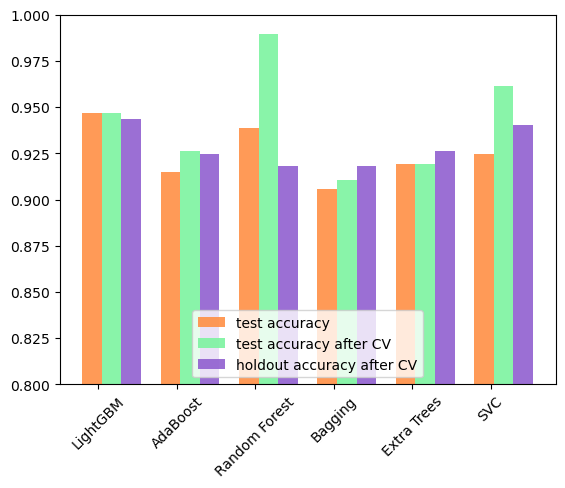

In [164]:
bar_width = 0.25

models = np.arange(len(df['model']))

plt.bar(models - bar_width/3, df['test_accuracy'], bar_width, 
        color='#FF8F45', label='test accuracy', alpha=0.9)
plt.bar(models + bar_width*2/3, df['test_accuracy_CV'], bar_width, 
        color='#7CF3A0', label='test accuracy after CV', alpha=0.9)
plt.bar(models + bar_width*5/3, df['holdout_accuracy_CV'], bar_width, 
        color='#905FD0', label='holdout accuracy after CV', alpha=0.9)

plt.xticks(models, df['model'])
plt.xticks(rotation = 45)
plt.ylim(0.8, 1)
plt.legend()
plt.legend(loc='lower center')
plt.show()

In [144]:
df.to_csv("accuracy_archaeologicalSoil_under.csv")

In [145]:
# acc_train1_LBGM
# acc_test1_LBGM

# acc_train1_ada
# acc_test1_ada

# acc_train1_rf
# acc_test1_rf

# acc_train1_bagging
# acc_test1_bagging

# acc_train1_svc 
# acc_test1_svc

# acc_train2_LBGM
# acc_test2_LBGM

# acc_train2_ada 
# acc_test2_ada 

# acc_train2_rf
# acc_test2_rf

# acc_train2_bagging 
# acc_test2_bagging

# acc_train2_svc
# acc_test2_svc

### Overall feature importance

In [146]:
fi_LGBM['importance'] = fi_LGBM['importance'] / fi_LGBM['importance'].sum()

In [147]:
fi_LGBM['rank'] = range(1, fi_LGBM.shape[0]+1)

In [148]:
fi_LGBM.head(5)

,feature_name,importance,rank
24,Curvature,0.14,1
33,Ellipticity,0.09,2
22,Extent,0.07,3
13,L/T Ratio,0.06,4
23,Transparency,0.05,5


In [149]:
fi_LGBM = fi_LGBM[['feature_name','importance']]
fi_LGBM = fi_LGBM.reset_index(drop=True)

In [150]:
fi_ada['rank'] = range(1, fi_ada.shape[0]+1)

In [151]:
fi_ada.head(5)

,feature_name,importance,rank
24,Curvature,0.22,1
22,Extent,0.10,2
33,Ellipticity,0.10,3
25,Surface Area,0.08,4
19,Solidity,0.06,5


In [152]:
fi_ada = fi_ada[['feature_name','importance']]
fi_ada = fi_ada.reset_index(drop=True)

In [153]:
fi_rf['rank'] = range(1, fi_rf.shape[0]+1)

In [154]:
fi_rf.head()

,feature_name,importance,rank
29,T/W Ratio,0.12,1
30,CHull Surface Area,0.11,2
24,Curvature,0.08,3
25,Surface Area,0.06,4
7,Volume,0.05,5


In [155]:
fi_rf = fi_rf[['feature_name','importance']]
fi_rf = fi_rf.reset_index(drop=True)

In [156]:
fi_etree['rank'] = range(1, fi_etree.shape[0]+1)

In [157]:
fi_etree = fi_etree[['feature_name','importance']]
fi_etree = fi_etree.reset_index(drop=True)

In [158]:
fi = pd.concat([fi_LGBM, fi_ada, fi_rf, fi_etree])

In [159]:
mean_rank = fi.groupby('feature_name').mean()
mean_rank.sort_values(by='importance', ascending=False, inplace=True)

In [160]:
mean_rank.head(10)

,importance
feature_name,
Curvature,0.13
Ellipticity,0.07
CHull Surface Area,0.07
Extent,0.06
T/W Ratio,0.05
Surface Area,0.05
Solidity,0.05
L/T Ratio,0.05
W/L Ratio,0.04


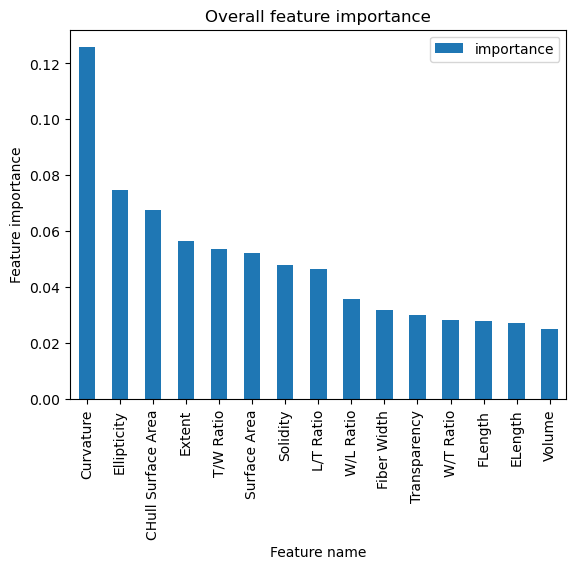

In [161]:
import matplotlib.pyplot as plt

mean_rank.reset_index(inplace=True)
mean_rank.head(15).plot(kind='bar', x='feature_name', y='importance')
plt.xlabel('Feature name')
plt.xticks(rotation = 90)
plt.ylabel('Feature importance')
plt.title('Overall feature importance')
plt.show()

In [162]:
mean_rank[['feature_name','importance']].to_csv("fi_ArchaeologicalSoil_under.csv")